In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## **Part 2-  Model Trainning**

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/project/preprocessed_data_v1.csv")
df.head()

,Name,Age,Overall,Club,Value(£),Age_Group,Overall_Group,Log_Value,Age_Rating
0,L. Goretzka,0.834593,2.940553,FC Bayern München,11.256167,26-30,81-90,2.245328,1.938783
1,Bruno Fernandes,0.834593,2.816114,Manchester United,9.661994,26-30,81-90,2.177662,1.877999
2,M. Acuña,1.481188,2.691675,Sevilla FC,5.580910,31-35,81-90,1.937863,2.391289
3,K. De Bruyne,1.696720,3.438311,Manchester City,13.360476,31-35,91-100,2.321635,3.001384
4,N. Barella,0.403530,2.816114,Inter,11.064866,26-30,81-90,2.237716,1.490780


**Choose model**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

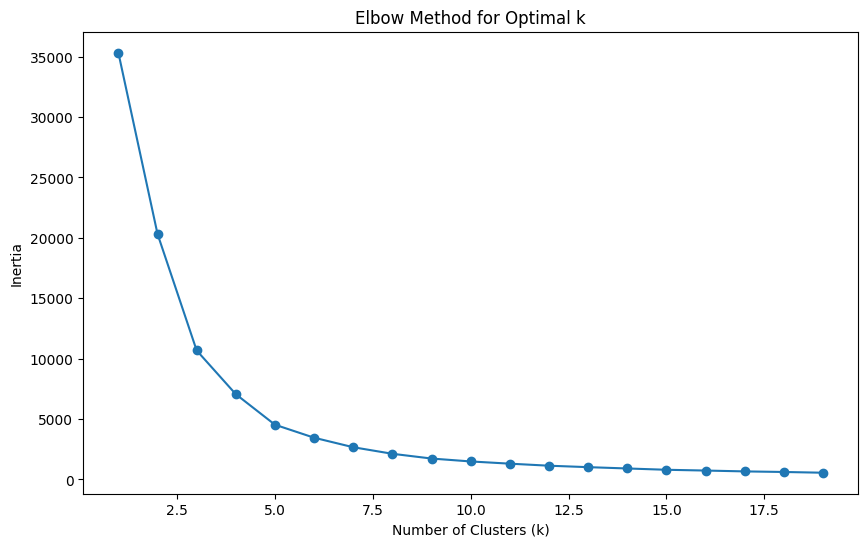

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


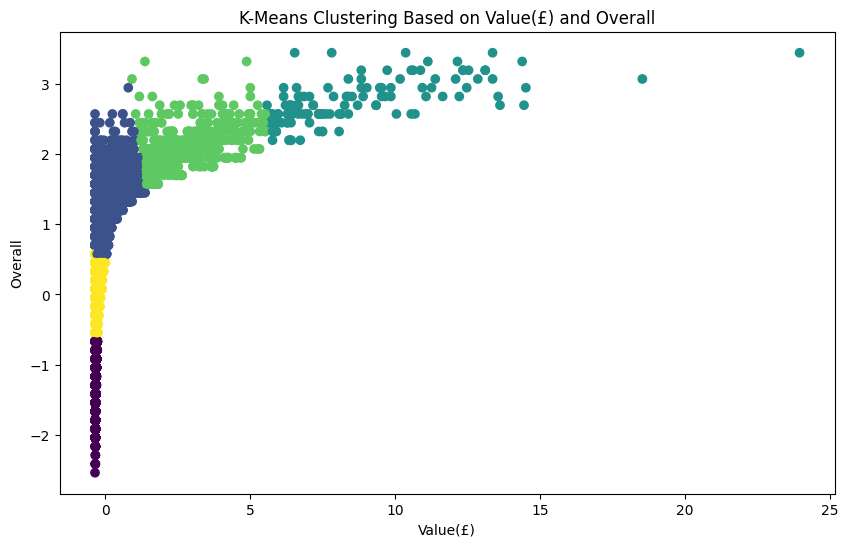

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering (based on 'Value(£)' and 'Overall')
features_for_clustering = ['Value(£)', 'Overall']

# Standardize the features
X = df[features_for_clustering]
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Elbow Method to find optimal k
inertia = []
possible_k_values = range(1, 20)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standardized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal value of k based on the elbow method analysis
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_Labels'] = kmeans.fit_predict(X_standardized)

# Visualize clusters using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Value(£)'], df['Overall'], c=df['Cluster_Labels'], cmap='viridis')
plt.title('K-Means Clustering Based on Value(£) and Overall')
plt.xlabel('Value(£)')
plt.ylabel('Overall')
plt.show()


<ipython-input-11-fa24d32d317c>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster_Labels').mean()[['Value(£)', 'Overall']]


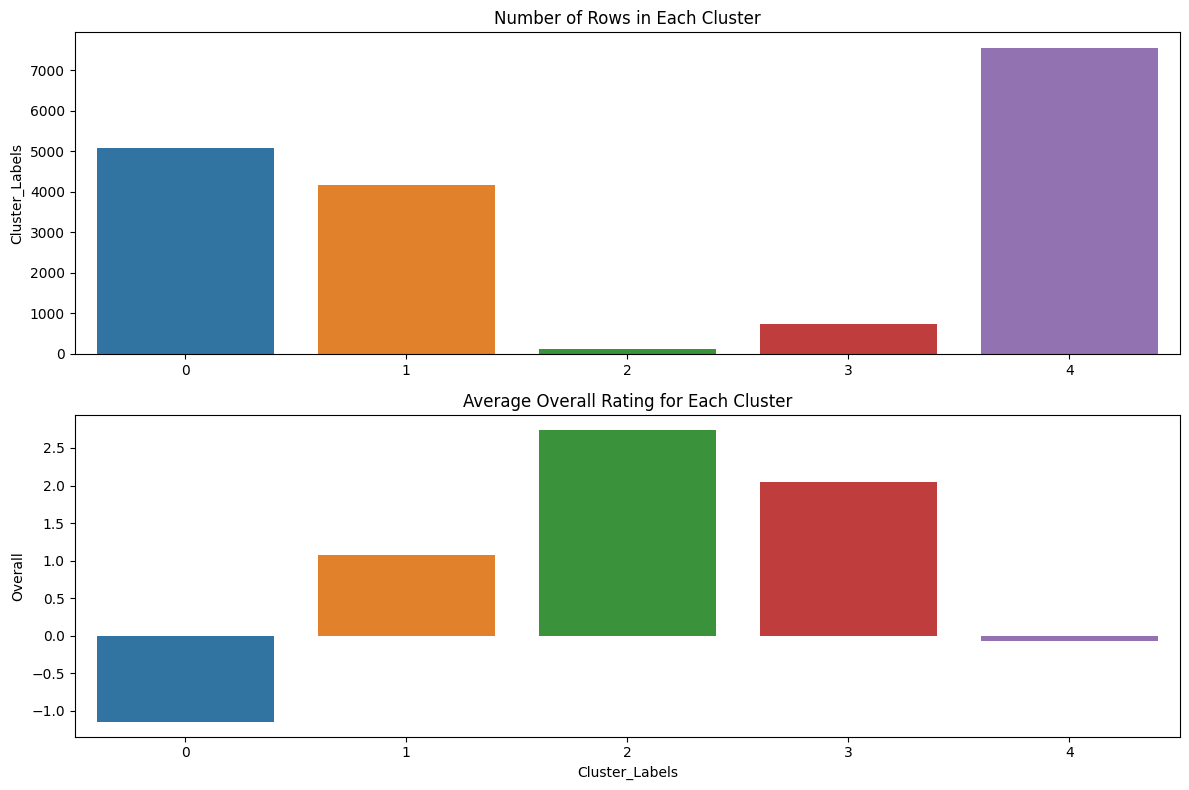

In [11]:
cluster_counts = df['Cluster_Labels'].value_counts().sort_index()

# Compute mean values for each cluster
cluster_means = df.groupby('Cluster_Labels').mean()[['Value(£)', 'Overall']]

# Visualize cluster characteristics
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
# Use cluster counts for the y-axis
sns.barplot(x=cluster_counts.index, y=cluster_counts)
plt.title('Number of Rows in Each Cluster')

plt.subplot(2, 1, 2)
# Use cluster means for the y-axis
sns.barplot(x=cluster_means.index, y=cluster_means['Overall'])
plt.title('Average Overall Rating for Each Cluster')

plt.tight_layout()
plt.show()

In [14]:
print("Cluster Characteristics (Mean Values):")
print(cluster_means)

Cluster Characteristics (Mean Values):
                Value(£)   Overall
Cluster_Labels                    
0              -0.317878 -1.147030
1               0.112622  1.081561
2               8.611864  2.744018
3               2.581152  2.040630
4              -0.241470 -0.070429


In [15]:

print("DataFrame with Cluster Assignment:")
print(df[['Name', 'Value(£)', 'Overall', 'Cluster_Labels']])


DataFrame with Cluster Assignment:
                  Name   Value(£)   Overall  Cluster_Labels
0          L. Goretzka  11.256167  2.940553               2
1      Bruno Fernandes   9.661994  2.816114               2
2             M. Acuña   5.580910  2.691675               2
3         K. De Bruyne  13.360476  3.438311               2
4           N. Barella  11.064866  2.816114               2
...                ...        ...       ...             ...
17655    Deng Xiongtao  -0.336662 -1.912583               0
17656   22 Lim Jun Sub  -0.336662 -1.912583               0
17657         A. Demir  -0.340488 -1.539264               0
17658     21 S. Czajor  -0.337938 -1.663704               0
17659  21 F. Jakobsson  -0.337938 -1.663704               0

[17660 rows x 4 columns]


In [16]:
df

,Name,Age,Overall,Club,Value(£),Age_Group,Overall_Group,Log_Value,Age_Rating,Cluster_Labels
0,L. Goretzka,0.834593,2.940553,FC Bayern München,11.256167,26-30,81-90,2.245328,1.938783,2
1,Bruno Fernandes,0.834593,2.816114,Manchester United,9.661994,26-30,81-90,2.177662,1.877999,2
2,M. Acuña,1.481188,2.691675,Sevilla FC,5.580910,31-35,81-90,1.937863,2.391289,2
3,K. De Bruyne,1.696720,3.438311,Manchester City,13.360476,31-35,91-100,2.321635,3.001384,2
4,N. Barella,0.403530,2.816114,Inter,11.064866,26-30,81-90,2.237716,1.490780,2
...,...,...,...,...,...,...,...,...,...,...
17655,Deng Xiongtao,-0.889660,-1.912583,Meizhou Hakka,-0.336662,15-20,40-50,-0.874824,-1.296297,0
17656,22 Lim Jun Sub,-1.320723,-1.912583,Jeju United FC,-0.336662,15-20,40-50,-0.874824,-1.512419,0
17657,A. Demir,0.403530,-1.539264,Ümraniyespor,-0.340488,26-30,51-60,-1.038158,-0.479084,0
17658,21 S. Czajor,-1.105192,-1.663704,Fleetwood Town,-0.337938,15-20,51-60,-0.923072,-1.323312,0
